In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.dates as mdates
from sklearn import linear_model
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVR
import plotly.graph_objs as go


In [ ]:
# Imported Sheet1 from GLDIND.xlsx
import pandas as pd
sheet_df_dictonary = pd.read_excel(r'/content/sample_data/Gold Prediction Dataset.xlsx', engine='openpyxl', sheet_name=['GoldMergedData'], skiprows=0)
GoldMergedData = sheet_df_dictonary['GoldMergedData']




# Data Discovery
## Data Basic Information

In [ ]:
GoldMergedData

,Date,Gold_Price,Gold_Open,Gold_High,Gold_Low,Silver_Price,Copper_Price,Brent_Oil,S&P_500,NASDAQ,DJI,US_10Y_Bond_Yield,CPI_Value,FED_Fund_Rate,US_Dollar_Index
0,2002-01-02,278.85,278.85,278.85,278.85,4.535,0.6580,21.00,1154.70,1979.25,10073.40,5.160,177.700,1.92,116.270
1,2002-01-03,278.45,278.85,278.45,278.45,4.608,0.6640,20.66,1165.30,2044.27,10172.14,5.111,177.700,1.72,116.540
2,2002-01-04,278.95,278.55,278.95,278.95,4.650,0.6745,22.18,1172.50,2059.38,10259.74,5.125,177.700,1.61,116.750
3,2002-01-07,278.75,278.90,278.75,278.75,4.667,0.7150,22.03,1164.90,2037.10,10197.05,5.049,177.700,1.61,116.970
4,2002-01-08,279.05,278.85,279.05,279.05,4.640,0.7085,22.02,1160.70,2055.74,10150.55,5.083,177.700,1.61,117.230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,2021-12-28,1805.37,1811.84,1820.70,1804.38,23.121,4.4295,78.94,4786.36,15781.72,36398.21,1.484,280.126,0.08,96.168
5206,2021-12-29,1803.66,1805.59,1808.16,1788.94,22.858,4.4100,79.23,4793.06,15766.22,36488.63,1.556,280.126,0.08,95.886
5207,2021-12-30,1815.01,1803.99,1817.44,1795.78,23.060,4.3925,79.32,4778.73,15741.56,36398.08,1.507,280.126,0.08,95.919
5208,2021-12-31,1828.39,1815.44,1830.58,1814.15,23.352,4.4635,77.78,4766.18,15644.97,36338.30,1.512,280.126,0.07,95.553


In [ ]:
# display the dimension of the dataset
GoldMergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5210 entries, 0 to 5209
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               5210 non-null   datetime64[ns]
 1   Gold_Price         5210 non-null   float64       
 2   Gold_Open          5210 non-null   float64       
 3   Gold_High          5210 non-null   float64       
 4   Gold_Low           5210 non-null   float64       
 5   Silver_Price       5108 non-null   float64       
 6   Copper_Price       5060 non-null   float64       
 7   Brent_Oil          5144 non-null   float64       
 8   S&P_500            5037 non-null   float64       
 9   NASDAQ             5037 non-null   float64       
 10  DJI                5037 non-null   float64       
 11  US_10Y_Bond_Yield  5133 non-null   float64       
 12  CPI_Value          5210 non-null   float64       
 13  FED_Fund_Rate      5210 non-null   float64       
 14  US_Dolla

In [ ]:
GoldMergedData["Gold_Price"].describe()

count    5210.000000
mean     1086.726305
std       472.060831
min       278.450000
25%       648.262500
50%      1208.990000
75%      1381.900000
max      2063.810000
Name: Gold_Price, dtype: float64

In [ ]:
def compute_daily_returns(df):
    """Compute and return the daily return values."""
    # TODO: Your code here
    # Note: Returned DataFrame must have the same number of rows
    daily_return = (df / df.shift(1)) - 1
    daily_return[0] = 0
    return daily_return

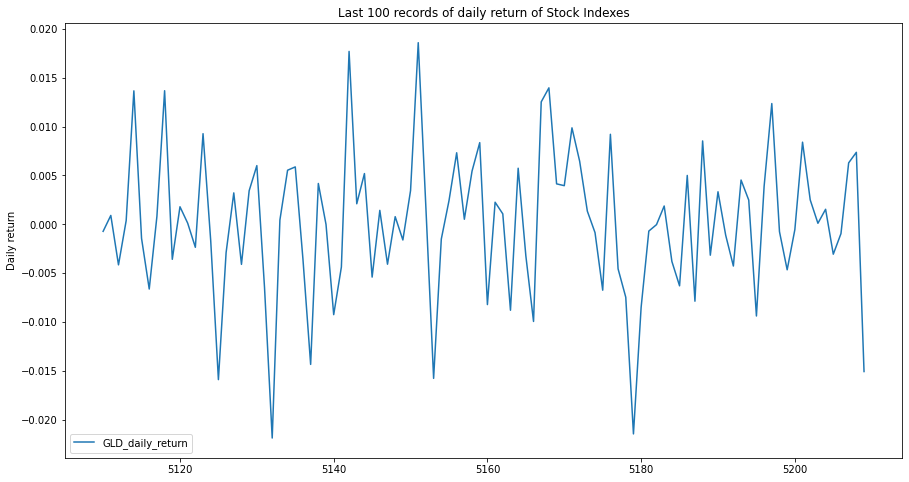

In [ ]:
GLD_daily_return = compute_daily_returns(GoldMergedData["Gold_Price"])
df_daily_return = pd.DataFrame({'GLD_daily_return':GLD_daily_return})

daily_ax = df_daily_return[-100:].plot(title='Last 100 records of daily return of Stock Indexes',figsize=(15,8))

daily_ax.set_ylabel('Daily return')
daily_ax.legend(loc='lower left')
plt.show()

Mean= 1086.7263051823415
Standard Deviation= 472.0608313132944
Kurtosis= -1.0778639135839214


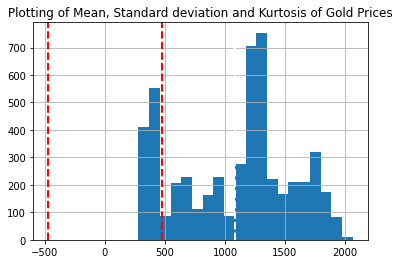

In [ ]:

# computing standard deviation of Gold stock
mean=GoldMergedData["Gold_Price"].mean()
std=GoldMergedData["Gold_Price"].std()
kurt=GoldMergedData["Gold_Price"].kurtosis()
print('Mean=',mean)
print('Standard Deviation=',std)
print('Kurtosis=',kurt)

#Plotting Histogram
GoldMergedData["Gold_Price"].hist(bins=20)

plt.axvline(mean, color='w',linestyle='dashed',linewidth=2)
plt.axvline(std, color='r',linestyle='dashed',linewidth=2)
plt.axvline(-std, color='r',linestyle='dashed',linewidth=2)
plt.title("Plotting of Mean, Standard deviation and Kurtosis of Gold Prices")
plt.show()

In [ ]:
print("Shape of the dataset: ", GoldMergedData.shape)
print("Length of the dataset: ", len(GoldMergedData))
print("Maximum closing price of gold during last twenty years: ", GoldMergedData["Gold_Price"].max())
print("Minimum closing price of gold during last twenty years: ", GoldMergedData["Gold_Price"].min())

Shape of the dataset:  (5210, 15)
Length of the dataset:  5210
Maximum closing price of gold during last twenty years:  2063.81
Minimum closing price of gold during last twenty years:  278.45


#  Data Cleaning
## Changing and Replace Values' Representation

In [ ]:
# Check Null values in the dataset
GoldMergedData.isnull().sum()

Date                   0
Gold_Price             0
Gold_Open              0
Gold_High              0
Gold_Low               0
Silver_Price         102
Copper_Price         150
Brent_Oil             66
S&P_500              173
NASDAQ               173
DJI                  173
US_10Y_Bond_Yield     77
CPI_Value              0
FED_Fund_Rate          0
US_Dollar_Index       67
dtype: int64

In [ ]:
GoldMergedData=GoldMergedData.dropna()

In [ ]:
# Check Null values in the dataset
GoldMergedData.isnull().sum()

Date                 0
Gold_Price           0
Gold_Open            0
Gold_High            0
Gold_Low             0
Silver_Price         0
Copper_Price         0
Brent_Oil            0
S&P_500              0
NASDAQ               0
DJI                  0
US_10Y_Bond_Yield    0
CPI_Value            0
FED_Fund_Rate        0
US_Dollar_Index      0
dtype: int64

# Exploratory Data Analysis

In [ ]:
# feature_columns = ['SMA_GLD20', 'Upper_band', 'Lower_band', 'SMA_GLD50',
#        'SMA_GLD200', 'SMA_H', 'MACD', 'MACD_S', 'MACD_H', 'RSI', 'STDEV',
#        'ROC']

econ_features = ['Gold_Price','Silver_Price', 'Copper_Price', 'Brent_Oil', 'S&P_500',
       'NASDAQ', 'DJI','US_10Y_Bond_Yield', 'CPI_Value', 'FED_Fund_Rate',
       'US_Dollar_Index']

### Correlation Analysis

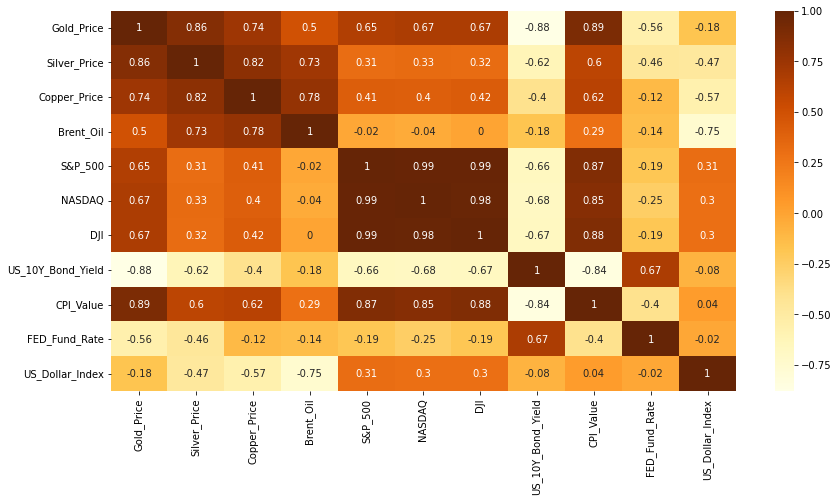

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns #seaborn is already installed
correlation = GoldMergedData[econ_features].corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

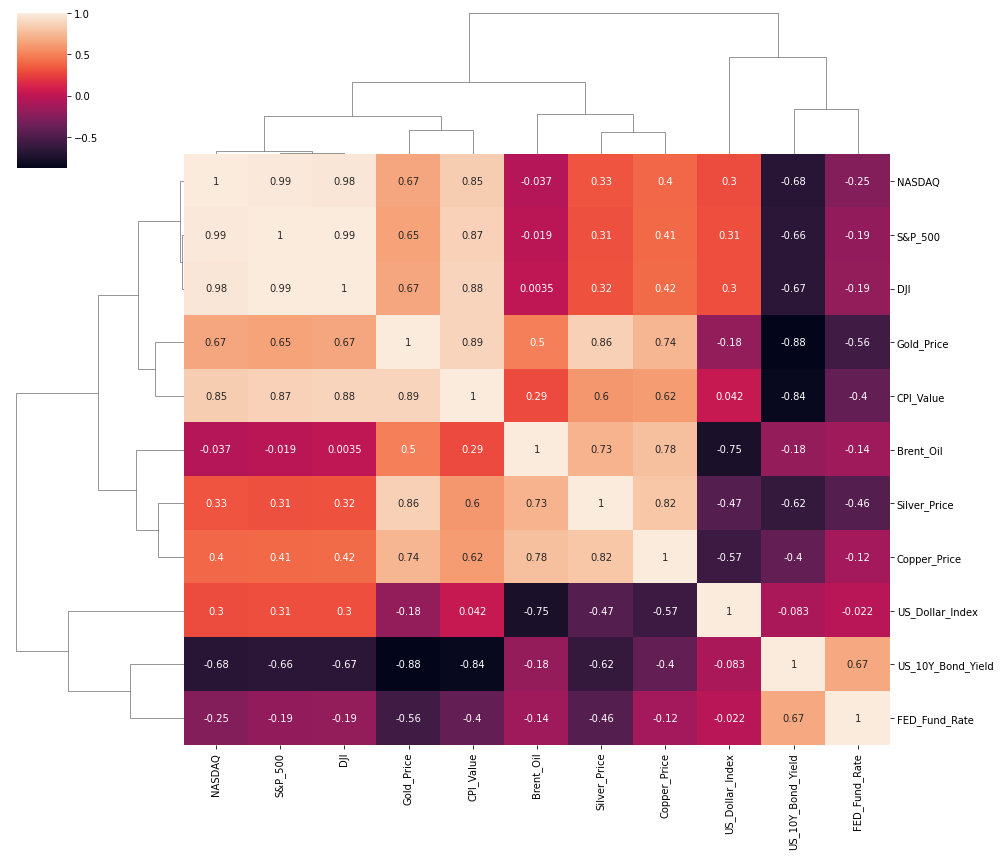

In [ ]:
sns.clustermap(GoldMergedData[econ_features].corr(),annot=True, figsize=(14, 12))

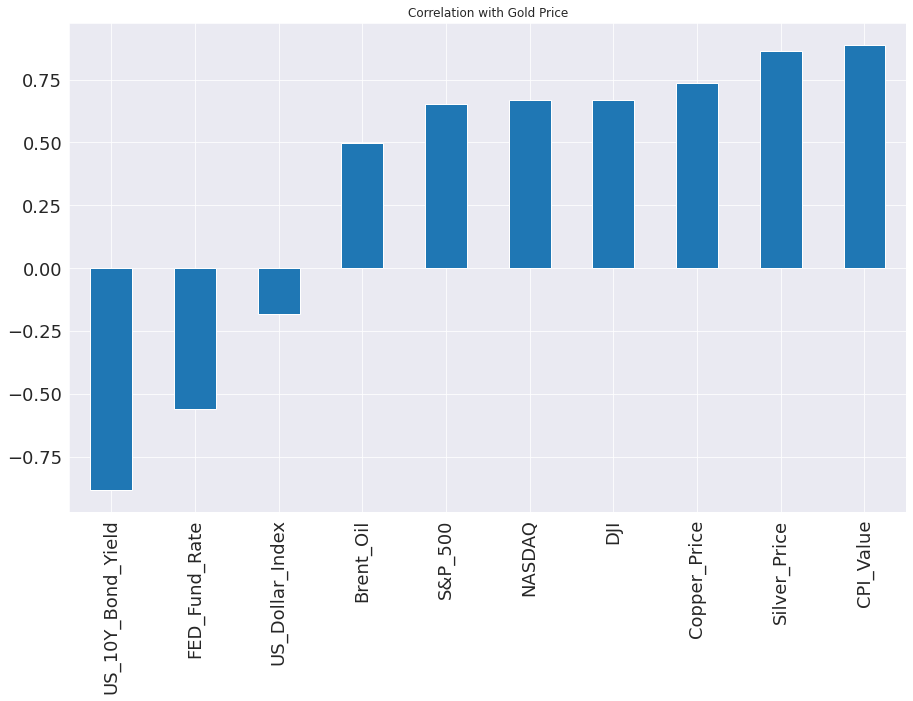

In [ ]:
sns.set_style('darkgrid')
sns.set_palette("tab10")
GoldMergedData[econ_features].corrwith(GoldMergedData['Gold_Price']).sort_values()[:-1].plot.bar(
        figsize = (15, 9), title = "Correlation with Gold Price", fontsize = 18,
         rot = 90,grid = True)

## Technical Indicators

### I. Bollinger Band

A Bollinger Band is a technical analysis tool that is described as a series of trendlines plotted two standard deviations (positively and negatively) away from a security's price's simple moving average (SMA) to generate oversold or overbought signals. Bollinger Bands are made up of three lines: a simple moving average (middle band), an upper and lower band, and an upper and lower band that are generally 2 standard deviations +/- from a 20-day simple moving average (which is the centre line).


In [ ]:
def calculate_SMA20(GoldMergedData, peroids=20):
    SMA20 = GoldMergedData.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA20
Gold_Price = GoldMergedData['Gold_Price']
date= GoldMergedData['Date']

def calculate_BB(GoldMergedData, peroids=20):
    STD = GoldMergedData.rolling(window=peroids,min_periods=peroids, center=False).std()
    SMA20 = calculate_SMA20(GoldMergedData)
    upper_band = SMA20 + (2 * STD)
    lower_band = SMA20 - (2 * STD)
    return upper_band, lower_band

# Calculate Simple Moving Average for GLD
SMA_GLD20 = calculate_SMA20(Gold_Price)

# Calculate Bollinger Bands for GLD
upper_band, lower_band = calculate_BB(Gold_Price)




In [ ]:
# Construct a 1 x 1 Plotly figure
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)
# price Line
fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=SMA_GLD20.tail(250),
        line=dict(width=1),
        name='SMA20',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=upper_band.tail(250),
        line=dict( width=1),
        name='Upper band',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)
fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=lower_band.tail(250),
        line=dict(width=1),
        name='Lower Band',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)
# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=date.tail(250),
        open=GoldMergedData.Gold_Open.tail(250),
        high=GoldMergedData.Gold_High.tail(250),
        low=GoldMergedData.Gold_Low.tail(250),
        close=GoldMergedData.Gold_Price.tail(250),
        increasing_line_color='black',
        decreasing_line_color='red',
        showlegend=False,
                
    ), row=1, col=1
)

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': "Bollinger Band",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )
fig.show()



### II. Moving Averages

[Moving Averages](https://www.investopedia.com/terms/m/movingaverage.asp) (MA) help to smooth out stock prices on a chart by filtering out short-term price fluctuations. We calculate moving averages over a defined period of time e.g. last 9, 50 or 200 days. There are two (most common) averages used in technical analysis which are:
* *Simple Moving Average (SMA)* - a simple average calculated over last N days e.g. 50, 100 or 200,
* *Exponential Moving Average (EMA)* - an average where greater weights are applied to recent prices.

MAs and their crossovers (see [Golden Cross](https://www.investopedia.com/terms/g/goldencross.asp) and [Death Cross](https://www.investopedia.com/terms/d/deathcross.asp) are often used as trade signals as they are so simple yet powerful.

In [ ]:
def calculate_SMA50(GoldMergedData, peroids=50):
    SMA50 = GoldMergedData.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA50
def calculate_SMA100(GoldMergedData, peroids=100):
    SMA100 = GoldMergedData.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA100
def calculate_SMA200(GoldMergedData, peroids=200):
    SMA200 = GoldMergedData.rolling(window=peroids, min_periods=peroids, center=False).mean()
    return SMA200

def calculate_EMA20(GoldMergedData, peroids=20):
    EMA20 = GoldMergedData.ewm(span=peroids, min_periods=peroids, adjust=True, ignore_na=False).mean()
    return EMA20


# Calculate Simple Moving Average for GLD
SMA_GLD50 = calculate_SMA50(Gold_Price)
SMA_GLD100 = calculate_SMA100(Gold_Price)
SMA_GLD200 = calculate_SMA200(Gold_Price)
EMA_GLD20 = calculate_EMA20(Gold_Price)
SMA_h = SMA_GLD50-SMA_GLD200


In [ ]:
# Construct a 2 x 1 Plotly figure
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1)
# price Line
fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=SMA_GLD50.tail(250),
        line=dict(width=1),
        name='SMA50',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)

fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=SMA_GLD200.tail(250),
        line=dict( width=1),
        name='SMA200',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)
# fig.append_trace(
#     go.Scatter(
#         x=date.tail(250),
#         y=EMA_GLD20.tail(365),
#         line=dict(width=1),
#         name='EMA20',
#         # showlegend=False,
#         legendgroup='1',
#     ), row=1, col=1
# )
# Candlestick chart for pricing
fig.append_trace(
    go.Candlestick(
        x=date.tail(250),
        open=GoldMergedData.Gold_Open.tail(250),
        high=GoldMergedData.Gold_High.tail(250),
        low=GoldMergedData.Gold_Low.tail(250),
        close=GoldMergedData.Gold_Price.tail(250),
        increasing_line_color='black',
        decreasing_line_color='red',
        showlegend=False
    ), row=1, col=1
)

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

# Colorize the histogram values
colors = np.where(SMA_h.tail(250) < 0, '#000', '#ff9900')
# Plot the histogram
fig.append_trace(
    go.Bar(
        x=date.tail(250),
        y=SMA_h.tail(250),
        name='Histogram',
        marker_color=colors,
    ), row=2, col=1
)
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': "Simple Moving Average (SMA)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )

fig.show()


### III. MACD

[Moving Average Convergence Divergence](https://www.investopedia.com/terms/m/macd.asp) (MACD) is an indicator which shows the relationship between two exponential moving averages i.e. 12-day and 26-day EMAs. We obtain MACD by substracting 26-day EMA (also called *slow EMA*) from the 12-day EMA (or *fast EMA*).

You can more more about entry/exit signals that can be read from MACD under [this link](https://www.investopedia.com/terms/m/macd.asp).

MACD line in yellow, our Signal line in black, and several notable crossover points circled in green. The histogram, displayed a bar chart under the MACD and Signal lines, reflects yellow when the difference between the MACD and Signal is positive (uptrend) and black when the value is negative (downtrend.)
https://www.alpharithms.com/calculate-macd-python-272222/#:~:text=MACD%20%E2%80%93%20the%20value%20of%20an,signal%20line%20of%20the%20MACD.

In [ ]:
def calculate_MACD(GoldMergedData, nslow=26, nfast=12):
    emaslow = GoldMergedData.ewm(span=nslow, min_periods=nslow, adjust=True, ignore_na=False).mean()
    emafast = GoldMergedData.ewm(span=nfast, min_periods=nfast, adjust=True, ignore_na=False).mean()
    MACD = emafast - emaslow
    MACD_s = MACD.ewm(span=9, min_periods=9, adjust=True, ignore_na=False).mean()
    MACD_h = MACD -MACD_s
    return MACD, MACD_s,MACD_h

# Calculate MACD for GLD
MACD, MACD_s,MACD_h = calculate_MACD(Gold_Price)


In [ ]:
# Construct a 2 x 1 Plotly figure
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=1)

# Candlestick chart for pricing
# fig.append_trace(
#     go.Candlestick(
#         x=date.tail(250),
#         open=GoldMergedData.Gold_Open.tail(250),
#         high=GoldMergedData.Gold_High.tail(250),
#         low=GoldMergedData.Gold_Low.tail(250),
#         close=GoldMergedData.Gold_Price.tail(250),
#         increasing_line_color='black',
#         decreasing_line_color='red',
#         showlegend=False
#     ), row=1, col=1
# )
# Fast Signal (%k)
fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=MACD.tail(250),
        line=dict(color='#ff9900', width=1),
        name='MACD line',
        # showlegend=False,
        legendgroup='2',
    ), row=1, col=1
)
# Slow signal (%d)
fig.append_trace(
    go.Scatter(
        x=date.tail(250),
        y=MACD_s.tail(250),
        line=dict(color='#000000', width=1),
        # showlegend=False,
        legendgroup='2',
        name='Signal line'
    ), row=1, col=1
)
# Colorize the histogram values
colors = np.where(MACD_h.tail(250) < 0, '#000', '#ff9900')
# Plot the histogram
fig.append_trace(
    go.Bar(
        x=date.tail(250),
        y=MACD_h.tail(250),
        name='MACD Histogram',
        marker_color=colors,
    ), row=1, col=1
)
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': "Moving Average Convergence Divergence (MACD)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )
fig.show()

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter(
        x=date,
        y=GoldMergedData.Gold_Price,
        line=dict(color='black', width=1),
        name='RSI',
        # showlegend=False,
        legendgroup='2',
    ))

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': "Gold Prices",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=16
        )    
    )

fig.show()

### IV. RSI

Another commonly used indicator is a [Relative Strength Index](https://www.investopedia.com/terms/r/rsi.asp) (RSI) that indicates magnitude of recent price changes. It can show that a stock is either *overbought* or *oversold*. Typically RSI value of 70 and above signal that a stock is becoming overbought/overvalued, meanwhile value of 30 and less can mean that it is oversold. Full range of RSI is from 0 to 100.


In [ ]:
def calculate_RSI(GoldMergedData, periods=14):
    # wilder's RSI
    delta = GoldMergedData.diff()
    up, down = delta.copy(), delta.copy()

    up[up < 0] = 0
    down[down > 0] = 0

    rUp = up.ewm(com=periods,adjust=False).mean()
    rDown = down.ewm(com=periods, adjust=False).mean().abs()

    rsi = 100 - 100 / (1 + rUp / rDown)
    return rsi


# Calculate RSI for GLD
RSI = calculate_RSI(Gold_Price)

fig = go.Figure()
fig.add_trace(go.Scatter(
        x=date.tail(250),
        y=RSI.tail(250),
        line=dict(color='black', width=1),
        name='RSI',
        # showlegend=False,
        legendgroup='2',
    ))

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': " Relative Strength Index (RSI)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )
fig.show()



In [ ]:
# # Construct a 2 x 1 Plotly figure
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(rows=2, cols=1)

# Candlestick chart for pricing
# fig.append_trace(
#     go.Candlestick(
#         x=date.tail(250),
#         open=GoldMergedData.Gold_Open.tail(250),
#         high=GoldMergedData.Gold_High.tail(250),
#         low=GoldMergedData.Gold_Low.tail(250),
#         close=GoldMergedData.Gold_Price.tail(250),
#         increasing_line_color='black',
#         decreasing_line_color='red',
#         showlegend=False
#     ), row=1, col=1
# )
# # RSI
# fig.append_trace(
#     go.Scatter(
#         x=date.tail(250),
#         y=RSI.tail(250),
#         line=dict(color='black', width=1),
#         name='RSI',
#         # showlegend=False,
#         legendgroup='2',
#     ), row=2, col=1,
# )


# # Make it pretty
# layout = go.Layout(
#     plot_bgcolor='#efefef',
#     # Font Families
#     font_family='Monospace',
#     font_color='#000000',
#     font_size=12,
#     xaxis=dict(
#         rangeslider=dict(
#             visible=False
#         )
#     )
# )
# # Update options and show plot
# fig.update_layout(layout)
# fig.show()

### VI. Standard Deviation

In [ ]:
def calculate_stdev(GoldMergedData,periods=5):
    STDEV = GoldMergedData.rolling(periods).std()
    return STDEV

# Calculating Standard deviation for GLD
STDEV= calculate_stdev(Gold_Price)


fig = go.Figure()
fig.add_trace(go.Scatter(
        x=date.tail(250),
        y=STDEV.tail(250),
        line=dict(color='black', width=1),
        name='STDEV',
        # showlegend=False,
        legendgroup='2',
    ))

# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=12,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)
# Update options and show plot
fig.update_layout(layout)
fig.update_layout(
    title={
        'text': "Standard Deviation",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )
fig.show()

In [ ]:
# # Construct a 2 x 1 Plotly figure
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(rows=2, cols=1)

# # Candlestick chart for pricing
# fig.append_trace(
#     go.Candlestick(
#         x=date.tail(250),
#         open=GoldMergedData.Gold_Open.tail(250),
#         high=GoldMergedData.Gold_High.tail(250),
#         low=GoldMergedData.Gold_Low.tail(250),
#         close=GoldMergedData.Gold_Price.tail(250),
#         increasing_line_color='black',
#         decreasing_line_color='red',
#         showlegend=False
#     ), row=1, col=1
# )
# # RSI
# fig.append_trace(
#     go.Scatter(
#         x=date.tail(250),
#         y=STDEV.tail(250),
#         line=dict(color='black', width=1),
#         name='STDEV',
#         # showlegend=False,
#         legendgroup='2',
#     ), row=2, col=1
# )


# # Make it pretty
# layout = go.Layout(
#     plot_bgcolor='#efefef',
#     # Font Families
#     font_family='Monospace',
#     font_color='#000000',
#     font_size=12,
#     xaxis=dict(
#         rangeslider=dict(
#             visible=False
#         )
#     )
# )
# # Update options and show plot
# fig.update_layout(layout)
# fig.show()

### VII. ROC

In [ ]:
# Rate of Change (ROC)
def calculate_ROC(GoldMergedData,n=14):
 N = GoldMergedData.diff(n)
 D = GoldMergedData.shift(n)
 ROC = pd.Series(N/D,name='Rate of Change')
 return ROC 

# Calculating Standard deviation for GLD
ROC= calculate_ROC(Gold_Price)


fig = go.Figure()
fig.add_trace(go.Scatter(
        x=date.tail(250),
        y=ROC.tail(250),
        line=dict(color='black', width=1),
        name='ROC',
        showlegend=False,
        legendgroup='2',
    ))

fig.update_layout(
    title={
        'text': "Rate of Change (ROC)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    font=dict(
        size=18
        )    
    )
fig.show()

In [ ]:
# # Construct a 2 x 1 Plotly figure
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# fig = make_subplots(rows=2, cols=1)

# # Candlestick chart for pricing
# fig.append_trace(
#     go.Candlestick(
#         x=date.tail(250),
#         open=GoldMergedData.Gold_Open.tail(250),
#         high=GoldMergedData.Gold_High.tail(250),
#         low=GoldMergedData.Gold_Low.tail(250),
#         close=GoldMergedData.Gold_Price.tail(250),
#         increasing_line_color='black',
#         decreasing_line_color='red',
#         showlegend=False
#     ), row=1, col=1
# )
# # ROC
# fig.append_trace(
#     go.Scatter(
#         x=date.tail(250),
#         y=ROC.tail(250),
#         line=dict(color='black', width=1),
#         name='ROC',
#         # showlegend=False,
#         legendgroup='2',
#     ), row=2, col=1
# )


# # Make it pretty
# layout = go.Layout(
#     plot_bgcolor='#efefef',
#     # Font Families
#     font_family='Monospace',
#     font_color='#000000',
#     font_size=12,
#     xaxis=dict(
#         rangeslider=dict(
#             visible=False
#         )
#     )
# )
# # Update options and show plot
# fig.update_layout(layout)
# fig.show()



In [ ]:
test = GoldMergedData
test['SMA_GLD20'] = SMA_GLD20
test['Upper_band'] = upper_band
test['Lower_band'] = lower_band
test['SMA_GLD50'] = SMA_GLD50
test['SMA_GLD200'] = SMA_GLD200
test['SMA_H'] = SMA_h
test['MACD'] = MACD
test['MACD_S'] = MACD_s
test['MACD_H'] = MACD_h
test['RSI'] = RSI
test['STDEV'] = STDEV
test['ROC'] = ROC


<ipython-input-30-18bf1b493c10>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-18bf1b493c10>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-18bf1b493c10>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-30-18bf1b4

In [ ]:
test

,Date,Gold_Price,Gold_Open,Gold_High,Gold_Low,Silver_Price,Copper_Price,Brent_Oil,S&P_500,NASDAQ,...,Lower_band,SMA_GLD50,SMA_GLD200,SMA_H,MACD,MACD_S,MACD_H,RSI,STDEV,ROC
0,2002-01-02,278.85,278.85,278.85,278.85,4.535,0.6580,21.00,1154.70,1979.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2002-01-03,278.45,278.85,278.45,278.45,4.608,0.6640,20.66,1165.30,2044.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
2,2002-01-04,278.95,278.55,278.95,278.95,4.650,0.6745,22.18,1172.50,2059.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.196721,NaN,NaN
3,2002-01-07,278.75,278.90,278.75,278.75,4.667,0.7150,22.03,1164.90,2037.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.918552,NaN,NaN
4,2002-01-08,279.05,278.85,279.05,279.05,4.640,0.7085,22.02,1160.70,2055.74,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.681021,0.230217,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5205,2021-12-28,1805.37,1811.84,1820.70,1804.38,23.121,4.4295,78.94,4786.36,15781.72,...,1761.795361,1800.4398,1792.97150,7.46830,0.975565,-2.509693,3.485259,53.619925,8.752826,0.011956
5206,2021-12-29,1803.66,1805.59,1808.16,1788.94,22.858,4.4100,79.23,4793.06,15766.22,...,1763.125793,1801.1678,1793.35955,7.80825,1.405763,-1.726602,3.132365,52.888398,3.161609,0.012121
5207,2021-12-30,1815.01,1803.99,1817.44,1795.78,23.060,4.3925,79.32,4778.73,15741.56,...,1762.403063,1802.1760,1793.82755,8.34845,2.632205,-0.854841,3.487046,57.054981,4.519021,0.022852
5208,2021-12-31,1828.39,1815.44,1830.58,1814.15,23.352,4.4635,77.78,4766.18,15644.97,...,1762.568351,1803.3664,1794.33745,9.02895,4.630447,0.242217,4.388230,61.370158,9.876701,0.025739


In [ ]:
test.to_excel('GLDIND.xlsx')

In [ ]:
# Check Null values in the dataset
test.isnull().sum()

Date                   0
Gold_Price             0
Gold_Open              0
Gold_High              0
Gold_Low               0
Silver_Price           0
Copper_Price           0
Brent_Oil              0
S&P_500                0
NASDAQ                 0
DJI                    0
US_10Y_Bond_Yield      0
CPI_Value              0
FED_Fund_Rate          0
US_Dollar_Index        0
SMA_GLD20             19
Upper_band            19
Lower_band            19
SMA_GLD50             49
SMA_GLD200           199
SMA_H                199
MACD                  25
MACD_S                33
MACD_H                33
RSI                    1
STDEV                  4
ROC                   14
dtype: int64

In [ ]:
# Dropping first 200 records from the data as it has null values because of introduction of technical indicators
df= test[200:]
display(df.head())

,Date,Gold_Price,Gold_Open,Gold_High,Gold_Low,Silver_Price,Copper_Price,Brent_Oil,S&P_500,NASDAQ,...,Lower_band,SMA_GLD50,SMA_GLD200,SMA_H,MACD,MACD_S,MACD_H,RSI,STDEV,ROC
212,2002-10-25,313.85,311.80,313.85,313.85,4.407,0.7145,25.46,897.6,1331.13,...,308.082349,316.538,307.16265,9.37535,-1.769097,-1.178497,-0.590600,45.922533,1.126721,-0.026520
213,2002-10-28,315.60,313.45,315.60,315.60,4.412,0.7135,25.68,890.2,1315.83,...,308.289792,316.556,307.34840,9.20760,-1.519282,-1.246654,-0.272629,49.260199,1.616091,-0.008327
214,2002-10-29,316.75,315.65,316.75,316.75,4.510,0.7040,25.31,882.1,1300.54,...,308.314122,316.611,307.53740,9.07360,-1.214507,-1.240224,0.025717,51.373319,2.251222,-0.010311
215,2002-10-30,316.40,317.00,316.40,316.40,4.494,0.7060,25.30,890.7,1326.73,...,308.641029,316.804,307.72565,9.07835,-0.989803,-1.190140,0.200337,50.685003,2.110391,-0.001420
216,2002-10-31,317.80,316.25,317.80,317.80,4.514,0.7195,25.72,885.8,1329.75,...,308.894441,316.979,307.91940,9.05960,-0.690792,-1.090271,0.399478,53.362967,1.475890,0.003315


In [ ]:
# Shift target because we want to predict the n + 1 day value
df['Shifted_Gold_Price'] = df['Gold_Price'].shift(-1)
df.insert(2, 'Shifted_Gold_Price', df.pop('Shifted_Gold_Price'))

<ipython-input-35-12bdc5b35748>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Dropping last column from the data as it has null values because of shifting
df1 = df[:-1]
print(df1.head())
print(df1.tail())

          Date  Gold_Price  Shifted_Gold_Price  Gold_Open  Gold_High  \
212 2002-10-25      313.85              315.60     311.80     313.85   
213 2002-10-28      315.60              316.75     313.45     315.60   
214 2002-10-29      316.75              316.40     315.65     316.75   
215 2002-10-30      316.40              317.80     317.00     316.40   
216 2002-10-31      317.80              320.25     316.25     317.80   

     Gold_Low  Silver_Price  Copper_Price  Brent_Oil  S&P_500  ...  \
212    313.85         4.407        0.7145      25.46    897.6  ...   
213    315.60         4.412        0.7135      25.68    890.2  ...   
214    316.75         4.510        0.7040      25.31    882.1  ...   
215    316.40         4.494        0.7060      25.30    890.7  ...   
216    317.80         4.514        0.7195      25.72    885.8  ...   

     Lower_band  SMA_GLD50  SMA_GLD200    SMA_H      MACD    MACD_S    MACD_H  \
212  308.082349    316.538   307.16265  9.37535 -1.769097 -1.1784

In [ ]:
df1.columns

Index(['Date', 'Gold_Price', 'Shifted_Gold_Price', 'Gold_Open', 'Gold_High',
       'Gold_Low', 'Silver_Price', 'Copper_Price', 'Brent_Oil', 'S&P_500',
       'NASDAQ', 'DJI', 'US_10Y_Bond_Yield', 'CPI_Value', 'FED_Fund_Rate',
       'US_Dollar_Index', 'SMA_GLD20', 'Upper_band', 'Lower_band', 'SMA_GLD50',
       'SMA_GLD200', 'SMA_H', 'MACD', 'MACD_S', 'MACD_H', 'RSI', 'STDEV',
       'ROC'],
      dtype='object')

In [ ]:
df1.shape

(4794, 28)

In [ ]:
df1

,Date,Gold_Price,Shifted_Gold_Price,Gold_Open,Gold_High,Gold_Low,Silver_Price,Copper_Price,Brent_Oil,S&P_500,...,Lower_band,SMA_GLD50,SMA_GLD200,SMA_H,MACD,MACD_S,MACD_H,RSI,STDEV,ROC
212,2002-10-25,313.85,315.60,311.80,313.85,313.85,4.407,0.7145,25.46,897.60,...,308.082349,316.5380,307.16265,9.37535,-1.769097,-1.178497,-0.590600,45.922533,1.126721,-0.026520
213,2002-10-28,315.60,316.75,313.45,315.60,315.60,4.412,0.7135,25.68,890.20,...,308.289792,316.5560,307.34840,9.20760,-1.519282,-1.246654,-0.272629,49.260199,1.616091,-0.008327
214,2002-10-29,316.75,316.40,315.65,316.75,316.75,4.510,0.7040,25.31,882.10,...,308.314122,316.6110,307.53740,9.07360,-1.214507,-1.240224,0.025717,51.373319,2.251222,-0.010311
215,2002-10-30,316.40,317.80,317.00,316.40,316.40,4.494,0.7060,25.30,890.70,...,308.641029,316.8040,307.72565,9.07835,-0.989803,-1.190140,0.200337,50.685003,2.110391,-0.001420
216,2002-10-31,317.80,320.25,316.25,317.80,317.80,4.514,0.7195,25.72,885.80,...,308.894441,316.9790,307.91940,9.05960,-0.690792,-1.090271,0.399478,53.362967,1.475890,0.003315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5204,2021-12-27,1810.90,1805.37,1808.19,1813.74,1802.89,22.989,4.4695,78.60,4791.19,...,1762.228494,1800.2436,1792.52145,7.72215,0.238177,-3.381008,3.619186,55.955977,10.517696,0.018441
5205,2021-12-28,1805.37,1803.66,1811.84,1820.70,1804.38,23.121,4.4295,78.94,4786.36,...,1761.795361,1800.4398,1792.97150,7.46830,0.975565,-2.509693,3.485259,53.619925,8.752826,0.011956
5206,2021-12-29,1803.66,1815.01,1805.59,1808.16,1788.94,22.858,4.4100,79.23,4793.06,...,1763.125793,1801.1678,1793.35955,7.80825,1.405763,-1.726602,3.132365,52.888398,3.161609,0.012121
5207,2021-12-30,1815.01,1828.39,1803.99,1817.44,1795.78,23.060,4.3925,79.32,4778.73,...,1762.403063,1802.1760,1793.82755,8.34845,2.632205,-0.854841,3.487046,57.054981,4.519021,0.022852


## Selecting Attributes 

In [ ]:
# Target column
df_target= pd.DataFrame(df1['Shifted_Gold_Price'])
# selecting Feature Columns

feature_columns_econ = ['Silver_Price', 'Copper_Price', 'Brent_Oil', 'S&P_500',
       'NASDAQ', 'DJI', 'US_10Y_Bond_Yield', 'CPI_Value', 'FED_Fund_Rate',
       'US_Dollar_Index']

feature_columns_ind = ['SMA_GLD20', 'Upper_band', 'Lower_band', 'SMA_GLD50',
       'SMA_GLD200', 'SMA_H', 'MACD', 'MACD_S', 'MACD_H', 'RSI','ROC']

feature_columns_all = ['Silver_Price', 'Copper_Price', 'Brent_Oil', 'S&P_500',
       'NASDAQ', 'DJI', 'US_10Y_Bond_Yield', 'CPI_Value', 'FED_Fund_Rate',
       'US_Dollar_Index', 'SMA_GLD20', 'Upper_band', 'Lower_band', 'SMA_GLD50',
       'SMA_GLD200', 'SMA_H', 'MACD', 'MACD_S', 'MACD_H', 'RSI','ROC']

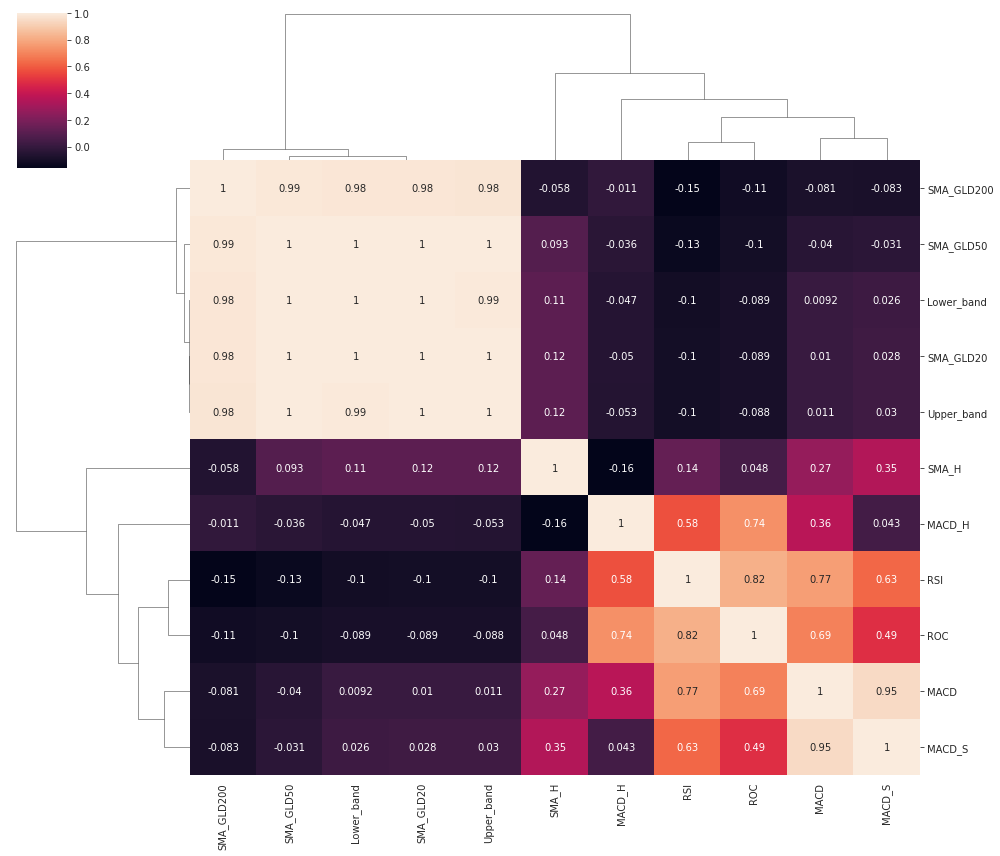

In [ ]:
sns.clustermap(df1[feature_columns_ind].corr(),annot=True, figsize=(14, 12))

## Normalizing the data
In this step I would perform feature scaling/normalization of feature variables using sklearn's MinMaxScaler function.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Feature columns
# Economic Variables
econ_feature_data = scaler.fit_transform(df1[feature_columns_econ])
econ_feature = pd.DataFrame(columns=feature_columns_econ, data=econ_feature_data, index=df1.index)
econ_feature

# Technical Indicator
ind_feature_data = scaler.fit_transform(df1[feature_columns_ind])
ind_feature = pd.DataFrame(columns=feature_columns_ind, data=ind_feature_data, index=df1.index)
ind_feature

# All Variables
all_feature_data = scaler.fit_transform(df1[feature_columns_all])
all_feature = pd.DataFrame(columns=feature_columns_all, data=all_feature_data, index=df1.index)
all_feature

#Target Column
df_target=scaler.fit_transform(np.array(df_target).reshape(-1,1))

In [ ]:
ind_feature

,SMA_GLD20,Upper_band,Lower_band,SMA_GLD50,SMA_GLD200,SMA_H,MACD,MACD_S,MACD_H,RSI,ROC
212,0.000922,0.002679,0.000000,0.000000,0.000000,0.519021,0.430905,0.419827,0.620991,0.409752,0.441478
213,0.000676,0.002106,0.000129,0.000011,0.000120,0.518650,0.432908,0.419170,0.628072,0.455868,0.494123
214,0.000569,0.001894,0.000144,0.000045,0.000242,0.518354,0.435352,0.419232,0.634716,0.485064,0.488381
215,0.000371,0.001341,0.000346,0.000163,0.000364,0.518365,0.437154,0.419715,0.638605,0.475554,0.514108
216,0.000255,0.000983,0.000503,0.000271,0.000489,0.518323,0.439551,0.420678,0.643040,0.512555,0.527810
...,...,...,...,...,...,...,...,...,...,...,...
5204,0.886276,0.834471,0.901531,0.911122,0.960031,0.515368,0.447000,0.398595,0.714744,0.548382,0.571580
5205,0.886889,0.835855,0.901262,0.911242,0.960322,0.514807,0.452912,0.406995,0.711761,0.516105,0.552814
5206,0.887789,0.836783,0.902087,0.911689,0.960573,0.515558,0.456362,0.414543,0.703902,0.505998,0.553291
5207,0.888764,0.839001,0.901639,0.912308,0.960876,0.516752,0.466195,0.422947,0.711801,0.563567,0.584344


## Train Test Split
In this step we would perform Train test split.

In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.80)
test_size=len(df1)-training_size

# Feature columns
# Economic Variables
X_train_E,X_test_E=econ_feature_data[0:training_size,:],econ_feature_data[training_size:len(econ_feature_data),:]

# Technical Indicator
X_train_T,X_test_T=ind_feature_data[0:training_size,:],ind_feature_data[training_size:len(ind_feature_data),:]

# All Variables
X_train_A,X_test_A=all_feature_data[0:training_size,:],all_feature_data[training_size:len(all_feature_data),:]


#Target Column
y_train,y_test=df_target[0:training_size,:],df_target[training_size:len(df_target),:1]

In [ ]:
dates= pd.DataFrame(df1['Date'])
y_train_dates,y_test_dates=dates[0:training_size],dates[training_size:len(df_target)]

In [ ]:
y_train_dates

,Date
212,2002-10-25
213,2002-10-28
214,2002-10-29
215,2002-10-30
216,2002-10-31
...,...
4204,2018-02-21
4205,2018-02-22
4206,2018-02-23
4207,2018-02-26


In [ ]:
y_test_dates

,Date
4209,2018-02-28
4210,2018-03-01
4211,2018-03-02
4212,2018-03-05
4213,2018-03-06
...,...
5204,2021-12-27
5205,2021-12-28
5206,2021-12-29
5207,2021-12-30


## Model Building

## LSTM Model

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM

# Feature columns
# Economic Variables
X_train_EL =X_train_E.reshape(X_train_E.shape[0],X_train_E.shape[1] , 1)
X_test_EL = X_test_E.reshape(X_test_E.shape[0],X_test_E.shape[1] , 1)

# Technical Indicator
X_train_TL =X_train_T.reshape(X_train_T.shape[0],X_train_T.shape[1] , 1)
X_test_TL = X_test_T.reshape(X_test_T.shape[0],X_test_T.shape[1] , 1)

# All Variables
X_train_AL =X_train_A.reshape(X_train_A.shape[0],X_train_A.shape[1] , 1)
X_test_AL = X_test_A.reshape(X_test_A.shape[0],X_test_A.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
# colnum=len(df. columns)
LSTM_E=Sequential()
LSTM_E.add(LSTM(200,return_sequences=True,input_shape=(10,1)))
LSTM_E.add(LSTM(150,return_sequences=True))
LSTM_E.add(LSTM(50))
LSTM_E.add(Dense(1))
LSTM_E.compile(loss='mean_squared_error',optimizer='adam')
LSTM_E.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 200)           161600    
                                                                 
 lstm_1 (LSTM)               (None, 10, 150)           210600    
                                                                 
 lstm_2 (LSTM)               (None, 50)                40200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 412,451
Trainable params: 412,451
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_E.fit(X_train_EL,y_train,validation_data=(X_test_EL,y_test),epochs=70,batch_size=64,verbose=1)

Epoch 1/70
60/60 [==============================] - 13s 109ms/step - loss: 0.0371 - val_loss: 0.0186
Epoch 2/70
60/60 [==============================] - 7s 121ms/step - loss: 0.0154 - val_loss: 0.0691
Epoch 3/70
60/60 [==============================] - 6s 97ms/step - loss: 0.0127 - val_loss: 0.1210
Epoch 4/70
60/60 [==============================] - 7s 111ms/step - loss: 0.0115 - val_loss: 0.1225
Epoch 5/70
60/60 [==============================] - 5s 87ms/step - loss: 0.0101 - val_loss: 0.0687
Epoch 6/70
60/60 [==============================] - 5s 87ms/step - loss: 0.0077 - val_loss: 0.0098
Epoch 7/70
60/60 [==============================] - 5s 88ms/step - loss: 0.0042 - val_loss: 0.0044
Epoch 8/70
60/60 [==============================] - 5s 87ms/step - loss: 0.0027 - val_loss: 0.0080
Epoch 9/70
60/60 [==============================] - 5s 86ms/step - loss: 0.0018 - val_loss: 0.0066
Epoch 10/70
60/60 [==============================] - 5s 87ms/step - loss: 0.0018 - val_loss: 0.0037
Epoch

In [ ]:
# colnum=len(df. columns)
LSTM_T=Sequential()
LSTM_T.add(LSTM(50,return_sequences=True,input_shape=(11,1)))
LSTM_T.add(LSTM(50,return_sequences=True))
LSTM_T.add(LSTM(50))
LSTM_T.add(Dense(1))
LSTM_T.compile(loss='mean_squared_error',optimizer='adam')
LSTM_T.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 11, 50)            10400     
                                                                 
 lstm_4 (LSTM)               (None, 11, 50)            20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_T.fit(X_train_TL,y_train,validation_data=(X_test_TL,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
60/60 [==============================] - 8s 46ms/step - loss: 0.0262 - val_loss: 0.0047
Epoch 2/100
60/60 [==============================] - 1s 24ms/step - loss: 5.8642e-04 - val_loss: 4.1331e-04
Epoch 3/100
60/60 [==============================] - 1s 24ms/step - loss: 3.2384e-04 - val_loss: 3.3975e-04
Epoch 4/100
60/60 [==============================] - 1s 24ms/step - loss: 2.7563e-04 - val_loss: 3.8384e-04
Epoch 5/100
60/60 [==============================] - 1s 24ms/step - loss: 2.5203e-04 - val_loss: 3.9829e-04
Epoch 6/100
60/60 [==============================] - 1s 24ms/step - loss: 2.4730e-04 - val_loss: 3.1252e-04
Epoch 7/100
60/60 [==============================] - 1s 25ms/step - loss: 2.6320e-04 - val_loss: 3.6469e-04
Epoch 8/100
60/60 [==============================] - 1s 24ms/step - loss: 2.4011e-04 - val_loss: 5.5347e-04
Epoch 9/100
60/60 [==============================] - 1s 24ms/step - loss: 2.3597e-04 - val_loss: 2.9667e-04
Epoch 10/100
60/60 [================

In [ ]:
# colnum=len(df. columns)
LSTM_A=Sequential()
LSTM_A.add(LSTM(50,return_sequences=True,input_shape=(21,1)))
LSTM_A.add(LSTM(50,return_sequences=True))
LSTM_A.add(LSTM(50))
LSTM_A.add(Dense(1))
LSTM_A.compile(loss='mean_squared_error',optimizer='adam')
LSTM_A.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 21, 50)            10400     
                                                                 
 lstm_7 (LSTM)               (None, 21, 50)            20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_A.fit(X_train_AL,y_train,validation_data=(X_test_AL,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
60/60 [==============================] - 9s 63ms/step - loss: 0.0363 - val_loss: 0.1444
Epoch 2/100
60/60 [==============================] - 2s 42ms/step - loss: 0.0054 - val_loss: 0.0580
Epoch 3/100
60/60 [==============================] - 3s 42ms/step - loss: 0.0037 - val_loss: 0.0086
Epoch 4/100
60/60 [==============================] - 3s 42ms/step - loss: 0.0029 - val_loss: 0.0061
Epoch 5/100
60/60 [==============================] - 3s 42ms/step - loss: 0.0019 - val_loss: 0.0026
Epoch 6/100
60/60 [==============================] - 2s 41ms/step - loss: 0.0010 - val_loss: 7.8090e-04
Epoch 7/100
60/60 [==============================] - 2s 41ms/step - loss: 5.5998e-04 - val_loss: 7.9605e-04
Epoch 8/100
60/60 [==============================] - 2s 41ms/step - loss: 5.2417e-04 - val_loss: 0.0023
Epoch 9/100
60/60 [==============================] - 2s 42ms/step - loss: 4.4105e-04 - val_loss: 0.0013
Epoch 10/100
60/60 [==============================] - 3s 43ms/step - loss: 4.205

## M5P

In [ ]:
!pip install m5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from m5py import M5Prime
m5p_E = M5Prime(max_depth=2,min_samples_leaf=3,use_smoothing=False)
m5p_E.fit(X_train_E,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=2,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
from m5py import M5Prime
m5p_T = M5Prime(max_depth=6,min_samples_leaf=3,use_smoothing=False)
m5p_T.fit(X_train_T,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=6,
        min_samples_leaf=3, use_smoothing=False)

In [ ]:
from m5py import M5Prime
m5p_A = M5Prime(max_depth=6,min_samples_leaf=3,use_smoothing=False)
m5p_A.fit(X_train_A,y_train) 

M5Prime(leaf_model=DeNormalizableLinearRegression(), max_depth=6,
        min_samples_leaf=3, use_smoothing=False)

## EVALUATE

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn import metrics


def validate_train_result(model, model_name,X_TRAIN):
    train_predict = model.predict(X_TRAIN)

    # Print out the MAE, MSE & RMSE
    print("MAE: ", metrics.mean_absolute_error(y_train, train_predict)) #MAE
    print("MSE: ", metrics.mean_squared_error(y_train, train_predict)) #MSE
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, train_predict))) #RMSE 
    print("R2: ", r2_score(y_train, train_predict)) #R2 

    
    ##Transformback to original form
    train_predict2=scaler.inverse_transform(train_predict.reshape(-1,1))
    y_train2=scaler.inverse_transform(y_train)

    dates= pd.DataFrame(df1['Date'])
    y_train_dates,y_test_dates=dates[0:training_size],dates[training_size:len(df_target)]

    #plot the graph
    f = plt.figure()
    f.set_figwidth(16)
    f.set_figheight(8)
    matplotlib.rc('xtick', labelsize=14)
    matplotlib.rc('ytick', labelsize=14) 
    plt.plot(y_train_dates, train_predict2,'red', label='Predict')
    plt.plot(y_train_dates, y_train2,'black', label='Actual')
    plt.ylabel('Price', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.title(model_name + ' Predict vs Actual', fontsize=20)
    plt.legend(loc='upper right',prop={"size":16})
    plt.show()

In [ ]:
def validate_test_result(model, model_name,X_TEST):
    test_predict = model.predict(X_TEST)

    # Print out the MAE, MSE & RMSE
    print("MAE: ", metrics.mean_absolute_error(y_test, test_predict)) #MAE
    print("MSE: ", metrics.mean_squared_error(y_test, test_predict)) #MSE
    print("RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, test_predict))) #RMSE 
    print("R2: ", r2_score(y_test, test_predict)) #R2 

    
    ##Transformback to original form
    test_predict2=scaler.inverse_transform(test_predict.reshape(-1,1))
    y_test2=scaler.inverse_transform(y_test)

    dates= pd.DataFrame(df1['Date'])
    y_train_dates,y_test_dates=dates[0:training_size],dates[training_size:len(df_target)]

    #plot the graph
    f = plt.figure()
    f.set_figwidth(16)
    f.set_figheight(8)
    matplotlib.rc('xtick', labelsize=14)
    matplotlib.rc('ytick', labelsize=14) 
    plt.plot(y_test_dates, test_predict2,'red', label='Predict')
    plt.plot(y_test_dates, y_test2,'black', label='Actual')
    plt.ylabel('Price', fontsize=16)
    plt.xlabel('Date', fontsize=16)
    plt.title(model_name + ' Predict vs Actual', fontsize=20)
    plt.legend(loc='upper right',prop={"size":16})
    plt.show()


    

### LSTM

120/120 [==============================] - 4s 20ms/step
MAE:  0.013038753380126002
MSE:  0.0002988564876586036
RMSE:  0.01728746620122809
R2:  0.9948366137715449


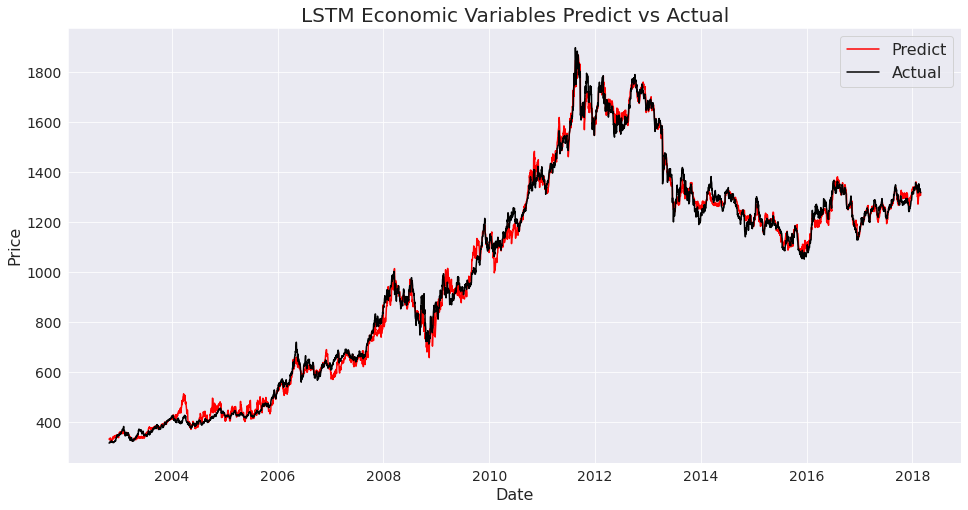

In [ ]:
validate_train_result(LSTM_E, "LSTM Economic Variables",X_train_EL)

30/30 [==============================] - 1s 18ms/step
MAE:  0.05553512431029374
MSE:  0.00481865585523665
RMSE:  0.06941653877309535
R2:  0.7636296579639399


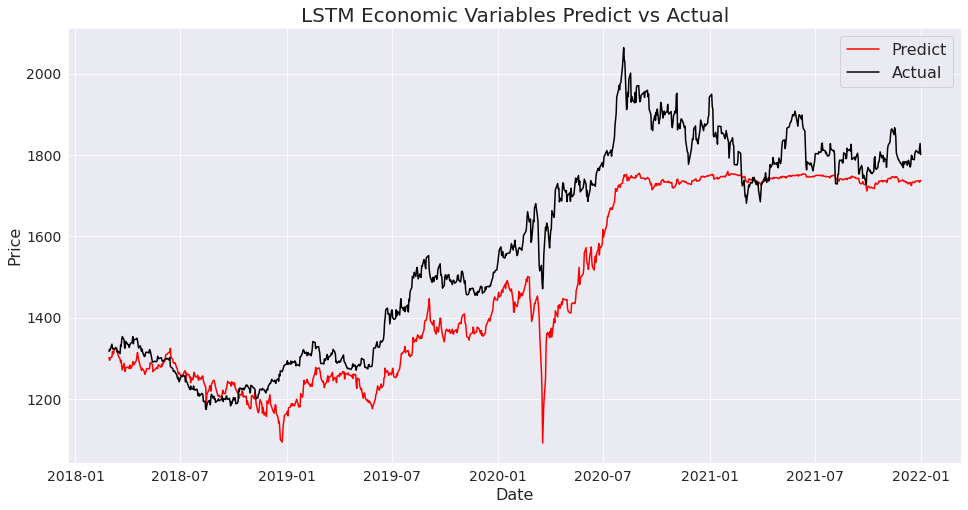

In [ ]:
validate_test_result(LSTM_E, "LSTM Economic Variables",X_test_EL)

120/120 [==============================] - 2s 5ms/step
MAE:  0.0057598905213511785
MSE:  6.887761311905845e-05
RMSE:  0.008299253768807077
R2:  0.9988099916390837


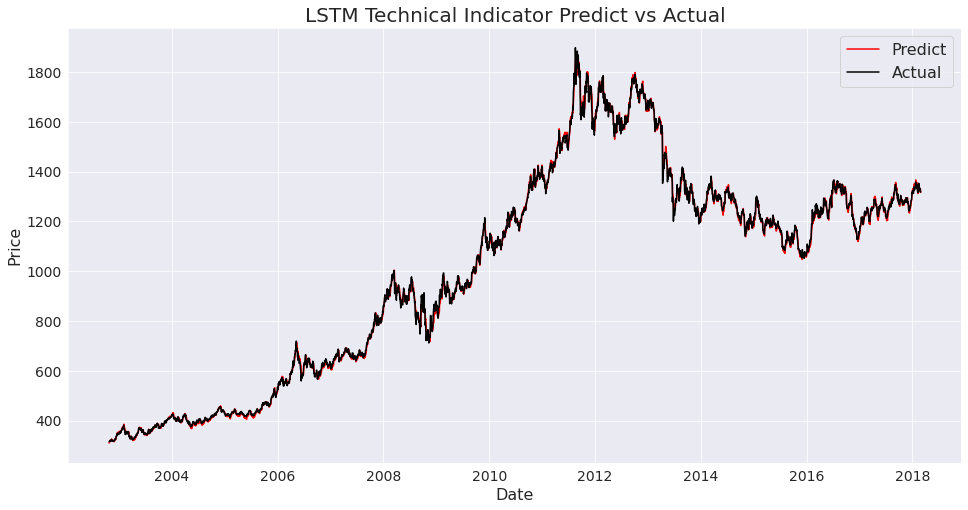

In [ ]:
validate_train_result(LSTM_T, "LSTM Technical Indicator",X_train_TL)

30/30 [==============================] - 1s 33ms/step
MAE:  0.007144105048945179
MSE:  9.632542844677536e-05
RMSE:  0.009814551871928506
R2:  0.9952749324390969


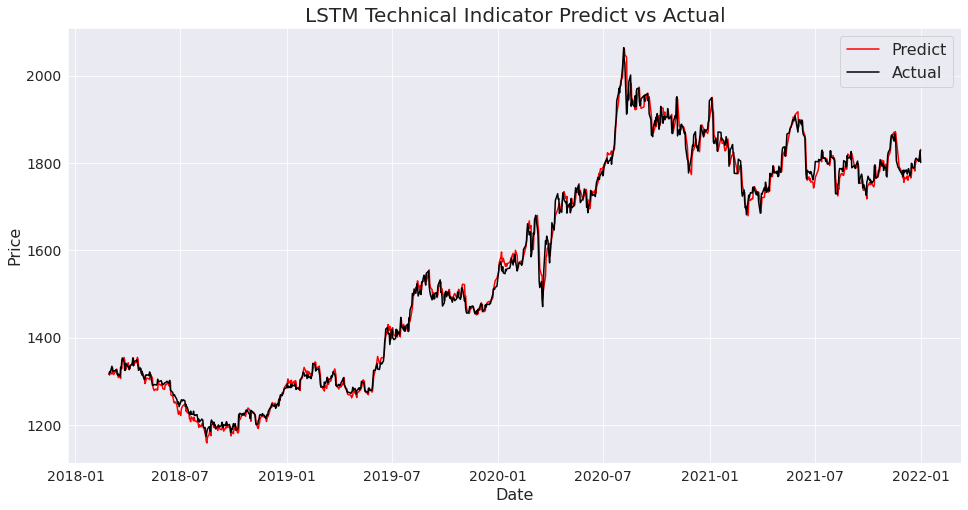

In [ ]:
validate_test_result(LSTM_T, "LSTM Technical Indicator",X_test_TL)

120/120 [==============================] - 3s 12ms/step
MAE:  0.011304193289699725
MSE:  0.00018031549678225608
RMSE:  0.013428160588191372
R2:  0.9968846634043089


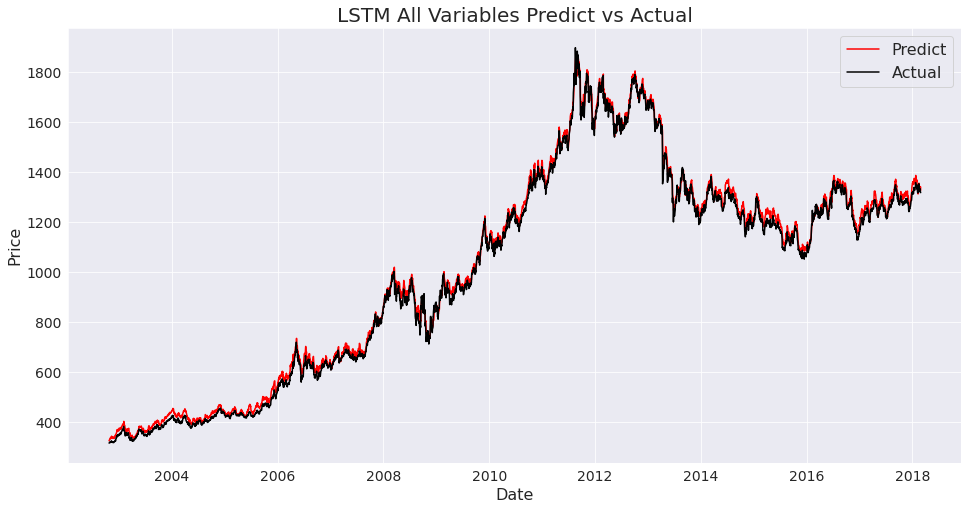

In [ ]:
validate_train_result(LSTM_A, "LSTM All Variables",X_train_AL)

30/30 [==============================] - 1s 26ms/step
MAE:  0.012515397789389643
MSE:  0.00024018810173947336
RMSE:  0.015498003153292793
R2:  0.9882180123530812


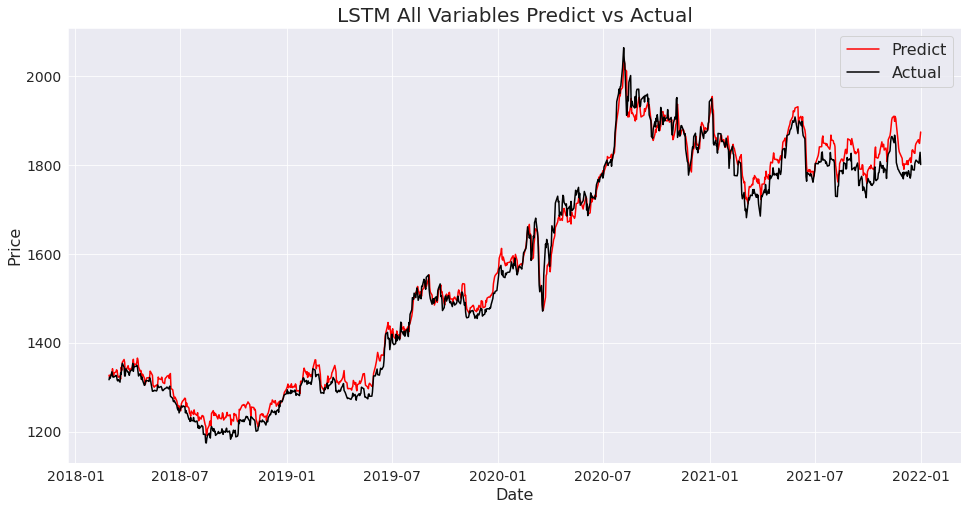

In [ ]:
validate_test_result(LSTM_A, "LSTM All Variables",X_test_AL)

### M5P

MAE:  0.036844514636442484
MSE:  0.0022250613651504467
RMSE:  0.04717055612509192
R2:  0.9615572969477924


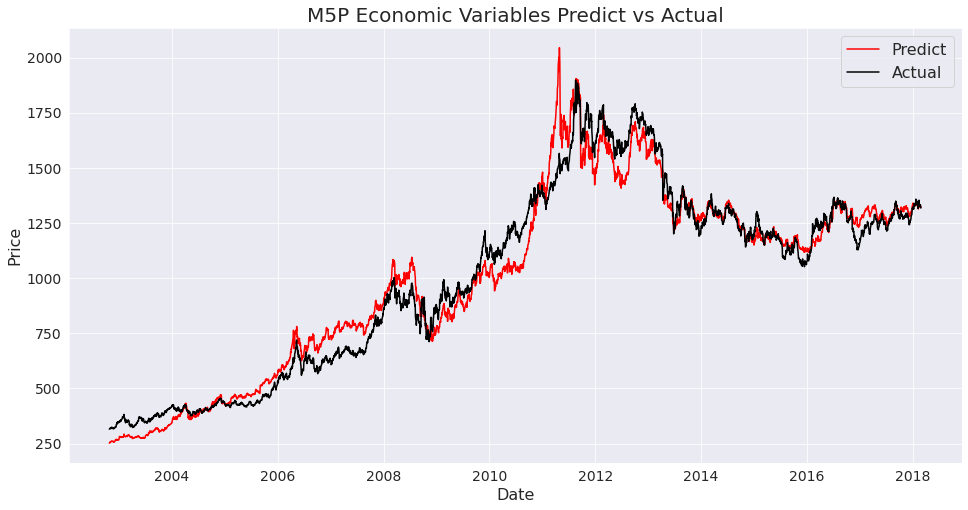

In [ ]:
validate_train_result(m5p_E, 'M5P Economic Variables',X_train_E)

MAE:  0.05371251361693168
MSE:  0.0056551076476997406
RMSE:  0.07520044978389252
R2:  0.7225990464778937


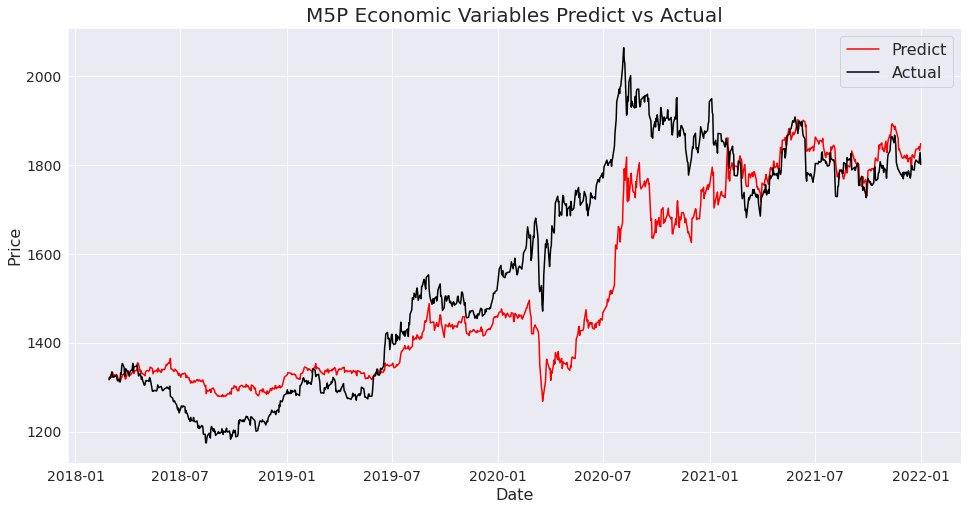

In [ ]:
validate_test_result(m5p_E, 'M5P Economic Variables',X_test_E)

MAE:  0.005377419300750205
MSE:  6.314817434833435e-05
RMSE:  0.007946582557825366
R2:  0.9989089799711668


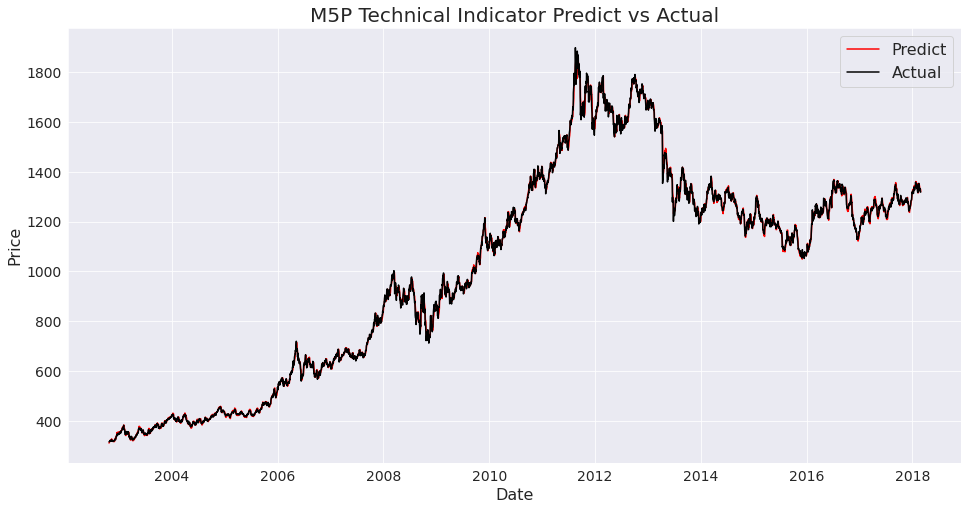

In [ ]:
validate_train_result(m5p_T, 'M5P Technical Indicator',X_train_T)

MAE:  0.006878008038451292
MSE:  9.726973063650531e-05
RMSE:  0.00986254179390411
R2:  0.9952286114238019


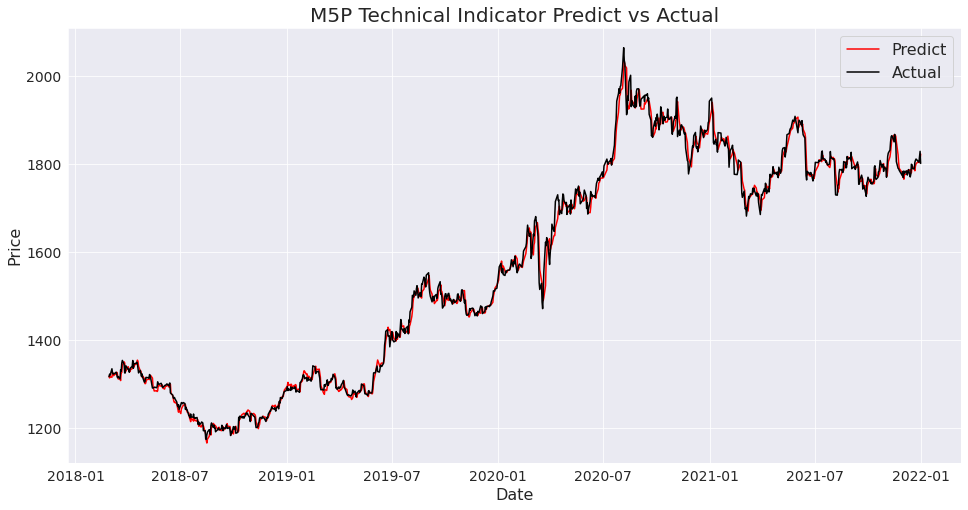

In [ ]:
validate_test_result(m5p_T, 'M5P Technical Indicator',X_test_T)

MAE:  0.005533121333332086
MSE:  6.464316071699842e-05
RMSE:  0.00804009705892898
R2:  0.998883150878119


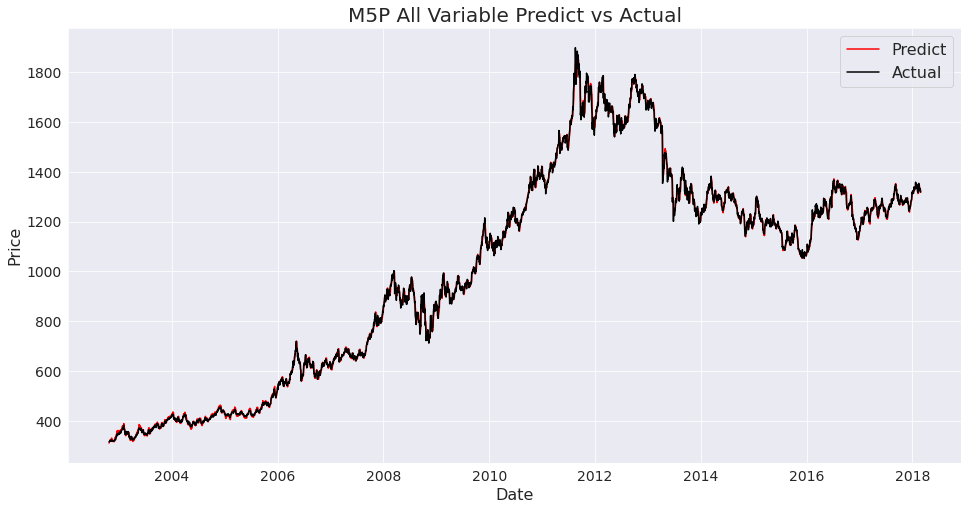

In [ ]:
validate_train_result(m5p_A, 'M5P All Variable',X_train_A)

MAE:  0.007045152720094746
MSE:  0.00010383544540094627
RMSE:  0.010189967880270588
R2:  0.9949065423051087


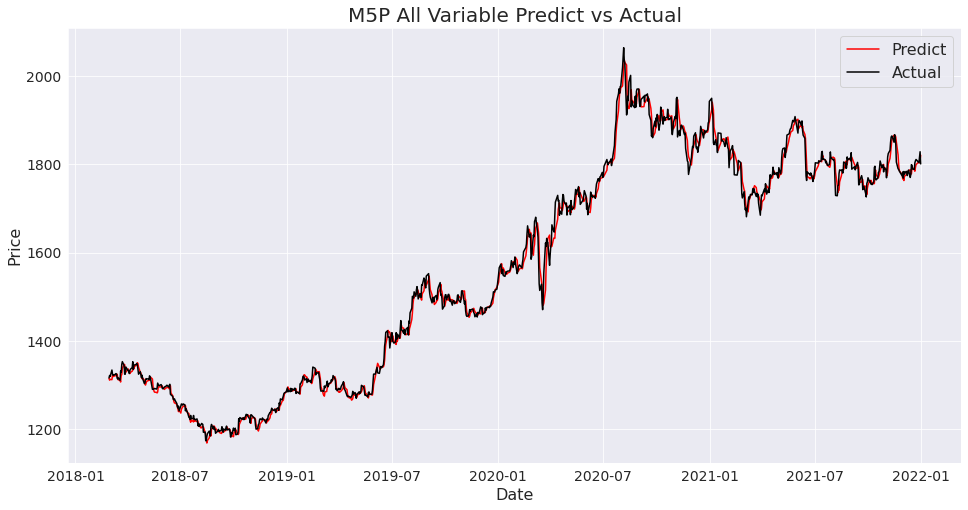

In [ ]:
validate_test_result(m5p_A, 'M5P All Variable',X_test_A)

#### 1. Benchmark Model :
 

I will use Decision Tree Regressor with default parameter as my Benchmark model for the project.

MAE:  0.0632567598310702
MSE:  0.007780654629742087
RMSE:  0.08820801907843803
R2:  0.618334230260926


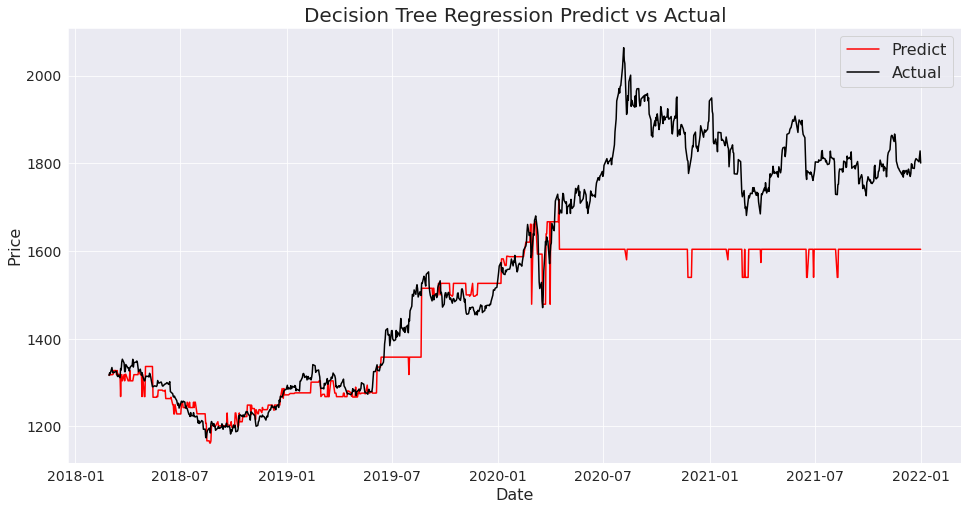

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=0)

benchmark_dt=dt.fit(X_train_A, y_train)

validate_test_result(benchmark_dt, 'Decision Tree Regression',X_test_A)

Support Vector Regressor (SVR)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



MAE:  0.09309323693338557
MSE:  0.010178514239547694
RMSE:  0.10088862294405497
R2:  0.5007116165795078


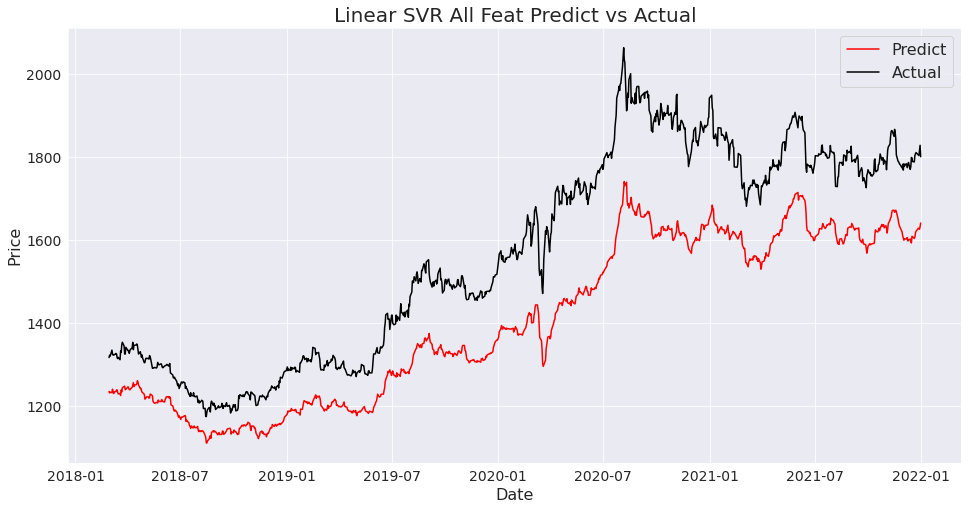

In [ ]:
# Save all soultion models
solution_models = {}
# SVR with  linear Kernel
svr_lin = SVR(kernel='linear')
linear_svr_clf_feat = svr_lin.fit(X_train_A,y_train)
validate_test_result(linear_svr_clf_feat,'Linear SVR All Feat',X_test_A)

#### Hyperparameter Tuning
In this step I will tune two parameters of SVR C and epsilon to see if the model shows any improvemen

In [ ]:
y_train.shape

(3835, 1)

MAE:  0.007502287184784465
MSE:  0.00011435141865818748
RMSE:  0.010693522275573538
R2:  0.9943907004873215


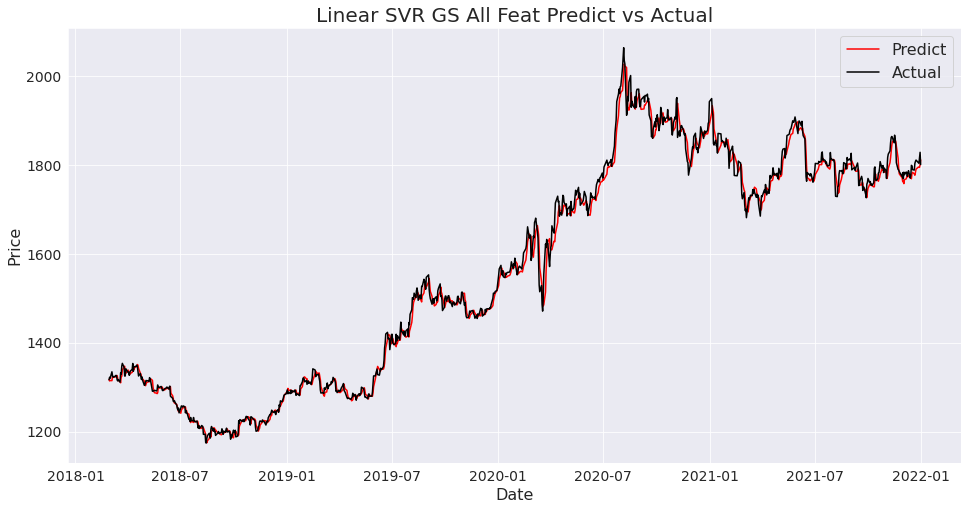

In [ ]:
linear_svr_parameters = {
    'C':[0.5, 1.0, 10.0, 50.0],
    'epsilon':[0, 0.1, 0.5, 0.7, 0.9],
}

lsvr_grid_search_feat = GridSearchCV(estimator=linear_svr_clf_feat,
                           param_grid=linear_svr_parameters,
                           cv=10,
)

y_train2= y_train.reshape(-1)
lsvr_grid_search_feat.fit(X_train_A, y_train2)

validate_test_result(lsvr_grid_search_feat,'Linear SVR GS All Feat',X_test_A)

### Solution Model : Random Forest

<ipython-input-78-a8db156fe819>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



MAE:  0.05158316590402054
MSE:  0.005194993280164049
RMSE:  0.0720763017930585
R2:  0.7451691145004784


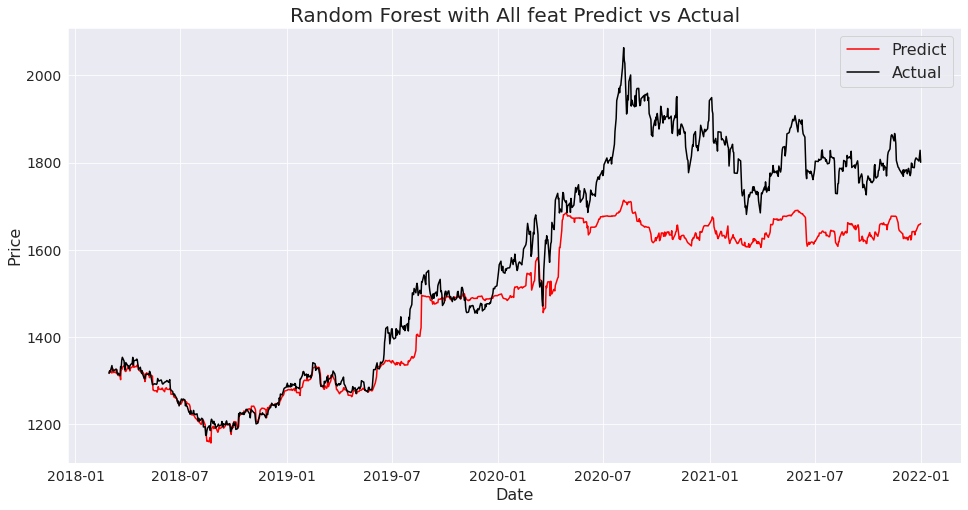

In [ ]:
rf_cl = RandomForestRegressor(n_estimators=50, random_state=0)
random_forest_clf_feat = rf_cl.fit(X_train_A,y_train)
validate_test_result(random_forest_clf_feat,'Random Forest with All feat',X_test_A)

In [ ]:
random_forest_parameters = {
    'n_estimators':[10,15,20, 50, 100],
    'max_features':['auto','sqrt','log2'],
    'max_depth':[2, 3, 5, 7,10],
}

grid_search_RF_feat = GridSearchCV(estimator=random_forest_clf_feat,
                           param_grid=random_forest_parameters,
                           cv=10,
)

grid_search_RF_feat.fit(X_train_A, y_train2)

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=50, random_state=0),
             param_grid={'max_depth': [2, 3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 15, 20, 50, 100]})

{'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}
MAE:  0.051491863950750755
MSE:  0.005239016737320444
RMSE:  0.07238105233637077
R2:  0.7430096243982005


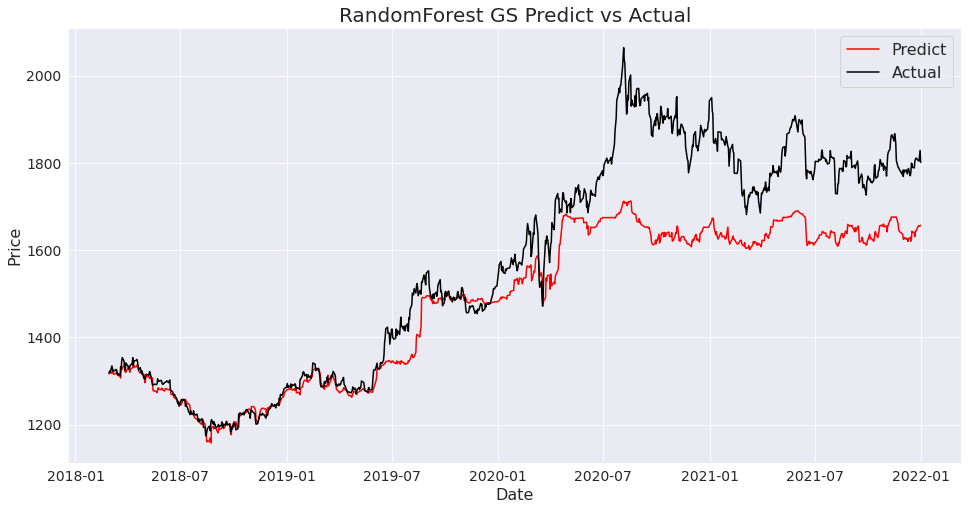

In [ ]:
print(grid_search_RF_feat.best_params_)
validate_test_result(grid_search_RF_feat,'RandomForest GS',X_test_A)

### Solution Model : Gradient Boosting Regressor

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:286: FutureWarning:

The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.



MAE:  0.052961820995716
MSE:  0.005439155821587112
RMSE:  0.07375063268601234
R2:  0.7331921679904172


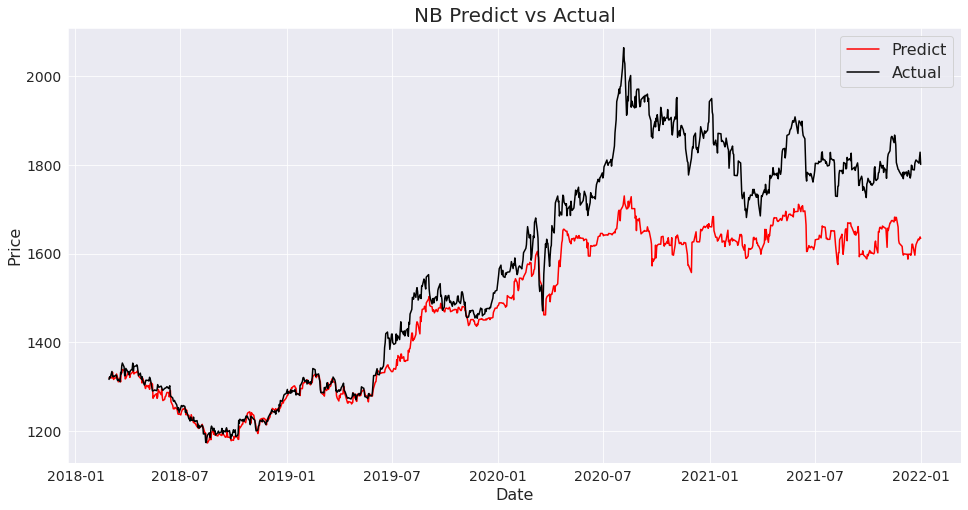

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
regr =GradientBoostingRegressor(n_estimators=70, learning_rate=0.1,max_depth=4, random_state=0, loss='ls')
GB_feat = regr.fit(X_train_A,y_train)
validate_test_result(GB_feat,'NB',X_test_A)
solution_models['GB All Feat'] = GB_feat

## LSTM1

Epoch 1/100
13/13 [==============================] - 6s 171ms/step - loss: 0.0865 - val_loss: 0.0294
Epoch 2/100
13/13 [==============================] - 1s 97ms/step - loss: 0.0408 - val_loss: 0.0192
Epoch 3/100
13/13 [==============================] - 1s 95ms/step - loss: 0.0314 - val_loss: 0.0237
Epoch 4/100
13/13 [==============================] - 1s 95ms/step - loss: 0.0203 - val_loss: 0.0259
Epoch 5/100
13/13 [==============================] - 1s 95ms/step - loss: 0.0170 - val_loss: 0.0225
Epoch 6/100
13/13 [==============================] - 1s 94ms/step - loss: 0.0149 - val_loss: 0.0366
Epoch 7/100
13/13 [==============================] - 1s 96ms/step - loss: 0.0131 - val_loss: 0.0746
Epoch 8/100
13/13 [==============================] - 1s 96ms/step - loss: 0.0120 - val_loss: 0.1054
Epoch 9/100
13/13 [==============================] - 1s 95ms/step - loss: 0.0121 - val_loss: 0.1570
Epoch 10/100
13/13 [==============================] - 1s 93ms/step - loss: 0.0117 - val_loss: 0.107

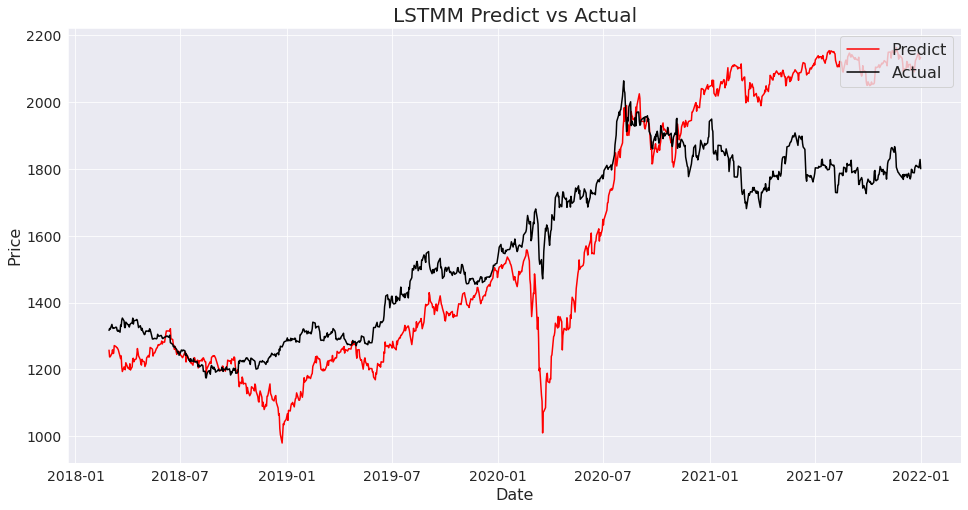

In [ ]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

LSTMmdl = Sequential()
LSTMmdl.add(LSTM(128, return_sequences = True, input_shape = (10, 1)))
LSTMmdl.add(LSTM(64, return_sequences = False))
# LSTMmdl.add(Dense(10))
LSTMmdl.add(Dense(1))

LSTMmdl.compile(optimizer = "adam", loss = "mean_squared_error")

LSTMmdl.fit(X_train_EL, y_train,validation_data=(X_test_EL,y_test), batch_size = 300, epochs = 100)
validate_test_result(LSTMmdl,'LSTMM',X_test_EL)